Carregamento das bibliotecas

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
#carregamento do dataset

dados_brutos = pd.read_csv('dados_consumo_total.csv')
dados_brutos = dados_brutos.drop(columns=['dps'])
dados_brutos.head()

,ligado,corrente,potencia,voltagem,nome_do_dispositivo,data_processamento
0,True,0.0,0.0,2253.0,Tomada 1,2024-04-09 23:59:04.656591
1,True,424.0,785.0,2166.0,Tomada 2,2024-04-09 23:59:04.656591
2,True,0.0,0.0,2177.0,Tomada 3,2024-04-09 23:59:04.656591
3,True,119.0,131.0,2163.0,Tomada 4,2024-04-09 23:59:04.656591
4,True,28.0,23.0,2165.0,Tomada 5,2024-04-09 23:59:04.656591


In [3]:
#criação de um novo dataset com as informações dos consumidores

consumidores = { 'nome_do_dispositivo': ['Tomada 1', 'Tomada 2', 'Tomada 3', 'Tomada 4', 'Tomada 5', 'Tomada 6', 'Tomada 7', 'Tomada 8', 'Tomada 9', 'Tomada 10'],
                 'dono_do_dispositivo': ['escritorio', 'doriel', 'doriel', 'doriel', 'escritorio', 'escritorio', 'escritorio', 'joao', 'joao', 'joao']}

dados_consumidores = pd.DataFrame(consumidores)
dados_consumidores.head()

,nome_do_dispositivo,dono_do_dispositivo
0,Tomada 1,escritorio
1,Tomada 2,doriel
2,Tomada 3,doriel
3,Tomada 4,doriel
4,Tomada 5,escritorio


In [4]:
import pandas as pd

# 1. Carregar o dataset
data = pd.read_csv("dados_brutos.csv")

# 2. Converter a coluna de data para datetime
data['data_processamento'] = pd.to_datetime(data['data_processamento'])

# 3. Ordenar por dispositivo e tempo
data_sorted = data.sort_values(by=['nome_do_dispositivo', 'data_registro'])

# 4. Calcular diferenças de tempo entre registros consecutivos
data_sorted['tempo_delta'] = data_sorted.groupby('nome_do_dispositivo')['data_processamento'].diff().dt.total_seconds()

# 5. Filtrar apenas registros onde a tomada estava ligada
data_sorted['tempo_usado'] = data_sorted['tempo_delta'].where(data_sorted['ligado'] == True, 0)

# 6. Adicionar coluna de dia da semana
data_sorted['dia_da_semana'] = data_sorted['data_processamento'].dt.day_name()

# 7. Agrupar por dispositivo e dia da semana, somando o tempo de uso
uso_semanal = data_sorted.groupby(['nome_do_dispositivo', 'dia_da_semana'])['tempo_usado'].sum().reset_index()

# 8. Converter tempo para horas
uso_semanal['tempo_usado_horas'] = ((uso_semanal['tempo_usado'] / 3600)/30).round()

# Exibir os resultados
uso_semanal = uso_semanal.iloc[:,[0,1,3]]
uso_semanal


C:\Users\Doriel\AppData\Local\Temp\ipykernel_24044\2819714365.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dados_brutos.csv")


,nome_do_dispositivo,dia_da_semana,tempo_usado_horas
0,Tomada 1,Friday,16.0
1,Tomada 1,Monday,16.0
2,Tomada 1,Saturday,14.0
3,Tomada 1,Sunday,14.0
4,Tomada 1,Thursday,13.0
...,...,...,...
65,Tomada 9,Saturday,14.0
66,Tomada 9,Sunday,14.0
67,Tomada 9,Thursday,13.0
68,Tomada 9,Tuesday,14.0


In [5]:
uso_semanal_pivot = uso_semanal.pivot(index='dia_da_semana', columns='nome_do_dispositivo', values='tempo_usado_horas').reset_index()
uso_semanal_pivot.columns.name = None  # Remover o nome das colunas
uso_semanal_pivot = uso_semanal_pivot.fillna(0)  # Preencher valores NaN com 0
horarios_consumo = uso_semanal_pivot

In [6]:
#split do campo data_processamento em data, mes e hora
dados_brutos['dia'] = pd.to_datetime(dados_brutos.data_processamento).apply(lambda x:int(x.strftime('%d')))
dados_brutos['mes'] = pd.to_datetime(dados_brutos.data_processamento).apply(lambda x:int(x.strftime('%m')))
dados_brutos['hora'] = pd.to_datetime(dados_brutos.data_processamento).apply(lambda x:int(x.strftime('%H')))
dados_brutos['data_registro'] = dados_brutos['data_processamento'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').date())
dados_brutos

,ligado,corrente,potencia,voltagem,nome_do_dispositivo,data_processamento,dia,mes,hora,data_registro
0,True,0.0,0.0,2253.0,Tomada 1,2024-04-09 23:59:04.656591,9,4,23,2024-04-09
1,True,424.0,785.0,2166.0,Tomada 2,2024-04-09 23:59:04.656591,9,4,23,2024-04-09
2,True,0.0,0.0,2177.0,Tomada 3,2024-04-09 23:59:04.656591,9,4,23,2024-04-09
3,True,119.0,131.0,2163.0,Tomada 4,2024-04-09 23:59:04.656591,9,4,23,2024-04-09
4,True,28.0,23.0,2165.0,Tomada 5,2024-04-09 23:59:04.656591,9,4,23,2024-04-09
...,...,...,...,...,...,...,...,...,...,...
363098,True,80.0,100.0,2180.0,Tomada 6,2024-07-08 23:59:19.570516,8,7,23,2024-07-08
363099,True,0.0,0.0,2192.0,Tomada 7,2024-07-08 23:59:20.078521,8,7,23,2024-07-08
363100,True,96.0,47.0,2187.0,Tomada 8,2024-07-08 23:59:20.598976,8,7,23,2024-07-08
363101,True,2129.0,4605.0,2199.0,Tomada 9,2024-07-08 23:59:20.828804,8,7,23,2024-07-08


In [7]:
#inclusão da coluna dia da semana

DIAS = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

dados_brutos['dia_da_semana'] = dados_brutos['data_registro'].apply(lambda x: DIAS[x.weekday()])
dados_brutos

,ligado,corrente,potencia,voltagem,nome_do_dispositivo,data_processamento,dia,mes,hora,data_registro,dia_da_semana
0,True,0.0,0.0,2253.0,Tomada 1,2024-04-09 23:59:04.656591,9,4,23,2024-04-09,Tuesday
1,True,424.0,785.0,2166.0,Tomada 2,2024-04-09 23:59:04.656591,9,4,23,2024-04-09,Tuesday
2,True,0.0,0.0,2177.0,Tomada 3,2024-04-09 23:59:04.656591,9,4,23,2024-04-09,Tuesday
3,True,119.0,131.0,2163.0,Tomada 4,2024-04-09 23:59:04.656591,9,4,23,2024-04-09,Tuesday
4,True,28.0,23.0,2165.0,Tomada 5,2024-04-09 23:59:04.656591,9,4,23,2024-04-09,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
363098,True,80.0,100.0,2180.0,Tomada 6,2024-07-08 23:59:19.570516,8,7,23,2024-07-08,Monday
363099,True,0.0,0.0,2192.0,Tomada 7,2024-07-08 23:59:20.078521,8,7,23,2024-07-08,Monday
363100,True,96.0,47.0,2187.0,Tomada 8,2024-07-08 23:59:20.598976,8,7,23,2024-07-08,Monday
363101,True,2129.0,4605.0,2199.0,Tomada 9,2024-07-08 23:59:20.828804,8,7,23,2024-07-08,Monday


In [8]:
#Agrupamento dos dados de inferência 

dados_tratamento_agrupado_potencia = dados_brutos.groupby(['nome_do_dispositivo', 'hora', 'dia', 'mes', 'dia_da_semana'])['potencia'].mean().reset_index()
dados_tratamento_agrupado_voltagem = dados_brutos.groupby(['nome_do_dispositivo', 'hora', 'dia', 'mes', 'dia_da_semana'])['voltagem'].mean().reset_index()
dados_tratamento_agrupado_corrente = dados_brutos.groupby(['nome_do_dispositivo', 'hora', 'dia', 'mes', 'dia_da_semana'])['corrente'].mean().reset_index()
dados_tratamento_agrupado = pd.concat([dados_tratamento_agrupado_corrente, dados_tratamento_agrupado_potencia, dados_tratamento_agrupado_voltagem], axis=1)
dados_tratamento_agrupado = dados_tratamento_agrupado.iloc[:,[0,1,2,3,4,5,11,17]]


In [9]:
# for dia in horarios_consumo.dia_da_semana:
#     teste = horarios_consumo[horarios_consumo['dia_da_semana'] == dia]
horario_consumo_index = horarios_consumo.set_index('dia_da_semana') 
dic = horario_consumo_index.to_dict()
dados_tratamento_agrupado = dados_tratamento_agrupado.copy()
dados_tratamento_agrupado['uso_dia'] = dados_tratamento_agrupado.apply(lambda row: dic[row['nome_do_dispositivo']][row['dia_da_semana']], axis=1)



In [10]:

dados_tratamento_agrupado.set_index(['nome_do_dispositivo', 'dia_da_semana'])
horarios_consumo.to_dict().keys()

dict_keys(['dia_da_semana', 'Tomada 1', 'Tomada 10', 'Tomada 2', 'Tomada 3', 'Tomada 4', 'Tomada 5', 'Tomada 6', 'Tomada 7', 'Tomada 8', 'Tomada 9'])

In [11]:
dados_tratamento_agrupado
def get_periodo(hora):
    if 6 <= hora < 12:
        return 'manhã'
    elif 12 <= hora < 18:
        return 'tarde'
    elif 18 <= hora < 24:
        return 'noite'
    else:
        return 'madrugada'

dados_tratamento_agrupado['periodo'] = dados_tratamento_agrupado['hora'].apply(get_periodo)
dados_tratamento_agrupado

,nome_do_dispositivo,hora,dia,mes,dia_da_semana,corrente,potencia,voltagem,uso_dia,periodo
0,Tomada 1,0,1,4,Monday,0.000000,0.000000,2218.733333,16.0,madrugada
1,Tomada 1,0,1,6,Saturday,29.769231,31.000000,2275.230769,14.0,madrugada
2,Tomada 1,0,1,7,Monday,27.615385,29.153846,2248.769231,16.0,madrugada
3,Tomada 1,0,2,4,Tuesday,0.000000,0.000000,2220.800000,14.0,madrugada
4,Tomada 1,0,2,5,Thursday,30.000000,31.000000,2173.000000,13.0,madrugada
...,...,...,...,...,...,...,...,...,...,...
25798,Tomada 9,23,30,4,Tuesday,159.000000,33.000000,2186.000000,14.0,noite
25799,Tomada 9,23,30,5,Thursday,1922.142857,4253.714286,2230.500000,13.0,noite
25800,Tomada 9,23,30,6,Sunday,723.250000,1419.083333,2219.333333,14.0,noite
25801,Tomada 9,23,31,3,Sunday,2078.714286,4479.571429,2201.000000,14.0,noite


Início do tratamento de dados para limpeza e preparação para serparação das bases

In [12]:
# Verificar a presença de valores nulos
print(dados_tratamento_agrupado.isnull().sum())

# Remover linhas com valores nulos
dados_tratamento_agrupado_limpo = dados_tratamento_agrupado.dropna()

# Verificar se ainda existem valores nulos após a remoção
print(dados_tratamento_agrupado_limpo.isnull().sum())

# Exibir o dataset limpo
dados_tratamento_agrupado_limpo

nome_do_dispositivo    0
hora                   0
dia                    0
mes                    0
dia_da_semana          0
corrente               0
potencia               0
voltagem               0
uso_dia                0
periodo                0
dtype: int64
nome_do_dispositivo    0
hora                   0
dia                    0
mes                    0
dia_da_semana          0
corrente               0
potencia               0
voltagem               0
uso_dia                0
periodo                0
dtype: int64


,nome_do_dispositivo,hora,dia,mes,dia_da_semana,corrente,potencia,voltagem,uso_dia,periodo
0,Tomada 1,0,1,4,Monday,0.000000,0.000000,2218.733333,16.0,madrugada
1,Tomada 1,0,1,6,Saturday,29.769231,31.000000,2275.230769,14.0,madrugada
2,Tomada 1,0,1,7,Monday,27.615385,29.153846,2248.769231,16.0,madrugada
3,Tomada 1,0,2,4,Tuesday,0.000000,0.000000,2220.800000,14.0,madrugada
4,Tomada 1,0,2,5,Thursday,30.000000,31.000000,2173.000000,13.0,madrugada
...,...,...,...,...,...,...,...,...,...,...
25798,Tomada 9,23,30,4,Tuesday,159.000000,33.000000,2186.000000,14.0,noite
25799,Tomada 9,23,30,5,Thursday,1922.142857,4253.714286,2230.500000,13.0,noite
25800,Tomada 9,23,30,6,Sunday,723.250000,1419.083333,2219.333333,14.0,noite
25801,Tomada 9,23,31,3,Sunday,2078.714286,4479.571429,2201.000000,14.0,noite


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para identificar outliers usando o método IQR
def iv_outliers(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(df[coluna] < lower_bound) | (df[coluna] > upper_bound)]
    

    for tomada in df['nome_do_dispositivo'].unique():
        df_tomada = df[df['nome_do_dispositivo'] == tomada]
        plt.figure(figsize=(10, 6))
        plt.boxplot(df_tomada[coluna], positions=[0], widths=0.6)
        plt.xticks([0], [tomada])
        plt.xlabel('Nome do Dispositivo')
        plt.ylabel(coluna.capitalize())
        plt.title(f'Outliers de {coluna.capitalize()} para {tomada}')

    outliers_dict = {}
    for tomada in df['nome_do_dispositivo'].unique():
        df_tomada = df[df['nome_do_dispositivo'] == tomada]
        outliers_dict[tomada] = outliers

    return plt.show()

def plot_iqr_outliers(df, coluna, coluna_dispositivo='nome_do_dispositivo'):
    """
    Identifica e plota outliers em uma coluna específica para cada dispositivo utilizando o método IQR,
    gerando boxplots estilizados com Seaborn.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados.
    coluna (str): Nome da coluna da qual identificar os outliers.
    coluna_dispositivo (str): Nome da coluna que identifica os dispositivos. Default é 'nome_do_dispositivo'.

    Retorna:
    None
    """
    
    # Verificações iniciais
    if coluna_dispositivo not in df.columns:
        raise ValueError(f"A coluna '{coluna_dispositivo}' não existe no DataFrame.")
    if coluna not in df.columns:
        raise ValueError(f"A coluna '{coluna}' não existe no DataFrame.")
    if not pd.api.types.is_numeric_dtype(df[coluna]):
        raise TypeError(f"A coluna '{coluna}' deve conter dados numéricos.")
    
    # Remover valores faltantes na coluna de interesse
    df = df.dropna(subset=[coluna_dispositivo, coluna])
    
    # Definir estilo do Seaborn
    sns.set(style="whitegrid")
    
    # Definir paleta de cores adequada
    num_dispositivos = df[coluna_dispositivo].nunique()
    palette = sns.color_palette("Set2", num_dispositivos)
    
    # Criar a figura e os eixos
    plt.figure(figsize=(14, 8))
    
    # Gerar o boxplot com Seaborn
    ax = sns.boxplot(
        x=coluna_dispositivo,
        y=coluna,
        data=df,
        palette=palette,
        showfliers=True,      # Mostrar os outliers
        linewidth=1.5,
        width=0.6
    )
    
    # Personalizar títulos e rótulos
    plt.title(f'Distribuição de {coluna.capitalize()} por Dispositivo', fontsize=18, weight='bold')
    plt.xlabel('Nome do Dispositivo', fontsize=14)
    plt.ylabel(coluna.capitalize(), fontsize=14)
    
    # Melhorar a legibilidade dos eixos
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Ajustar limites do eixo y para melhorar a visualização dos outliers
    # Opcional: Definir limites personalizados, se necessário
    # plt.ylim(ymin, ymax)
    
    # Remover linhas de grade redundantes
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Adicionar etiquetas aos outliers (opcional)
    # Esta parte é opcional e pode ser removida se não for necessária
    # for i, dispositivo in enumerate(df[coluna_dispositivo].unique()):
    #     dados = df[df[coluna_dispositivo] == dispositivo][coluna]
    #     Q1 = dados.quantile(0.25)
    #     Q3 = dados.quantile(0.75)
    #     IQR = Q3 - Q1
    #     lower_bound = Q1 - 1.5 * IQR
    #     upper_bound = Q3 + 1.5 * IQR
    #     outliers = dados[(dados < lower_bound) | (dados > upper_bound)]
    #     for outlier in outliers:
    #         plt.text(i, outlier, str(outlier), horizontalalignment='center', size='small', color='red', weight='semibold')
    
    # Ajustar layout para evitar sobreposição de elementos
    plt.tight_layout()
    
    # Exibir o gráfico
    plt.show()

In [14]:
# Remover outliers de cada tomada
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_sem_outliers = df[~((df[coluna] < lower_bound) | (df[coluna] > upper_bound))]
    return df_sem_outliers

# Remover outliers de cada tomada



In [15]:
def remover_outliers_por_dispositivo(df, coluna, coluna_dispositivo='nome_do_dispositivo'):
    # Verificar se as colunas existem no DataFrame
    if coluna_dispositivo not in df.columns:
        raise ValueError(f"A coluna '{coluna_dispositivo}' não existe no DataFrame.")
    if coluna not in df.columns:
        raise ValueError(f"A coluna '{coluna}' não existe no DataFrame.")
    
    # Verificar se a coluna para remover outliers é numérica
    if not pd.api.types.is_numeric_dtype(df[coluna]):
        raise TypeError(f"A coluna '{coluna}' deve conter dados numéricos.")
    
    # Aplicar a remoção de outliers por grupo de dispositivo
    df_sem_outliers = df.groupby(coluna_dispositivo).apply(lambda group: remover_outliers(group, coluna)).reset_index(drop=True)
    
    return df_sem_outliers

df_sem_outliers_concatenado = remover_outliers_por_dispositivo(dados_tratamento_agrupado_limpo, 'potencia')
df_sem_outliers_concatenado = remover_outliers_por_dispositivo(df_sem_outliers_concatenado, 'corrente')
df_sem_outliers_concatenado = remover_outliers_por_dispositivo(df_sem_outliers_concatenado, 'voltagem')


df_sem_outliers_concatenado.to_csv('dados_limpos.csv', index=False)
df_sem_outliers_concatenado


C:\Users\Doriel\AppData\Local\Temp\ipykernel_24044\119745220.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sem_outliers = df.groupby(coluna_dispositivo).apply(lambda group: remover_outliers(group, coluna)).reset_index(drop=True)
C:\Users\Doriel\AppData\Local\Temp\ipykernel_24044\119745220.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sem_outliers = df.groupby(coluna_dispositivo).apply(la

,nome_do_dispositivo,hora,dia,mes,dia_da_semana,corrente,potencia,voltagem,uso_dia,periodo
0,Tomada 1,0,1,4,Monday,0.000000,0.000000,2218.733333,16.0,madrugada
1,Tomada 1,0,1,6,Saturday,29.769231,31.000000,2275.230769,14.0,madrugada
2,Tomada 1,0,1,7,Monday,27.615385,29.153846,2248.769231,16.0,madrugada
3,Tomada 1,0,2,4,Tuesday,0.000000,0.000000,2220.800000,14.0,madrugada
4,Tomada 1,0,2,5,Thursday,30.000000,31.000000,2173.000000,13.0,madrugada
...,...,...,...,...,...,...,...,...,...,...
23822,Tomada 9,23,29,5,Wednesday,162.384615,33.846154,2217.692308,16.0,noite
23823,Tomada 9,23,29,6,Saturday,305.600000,392.200000,2218.400000,14.0,noite
23824,Tomada 9,23,30,4,Tuesday,159.000000,33.000000,2186.000000,14.0,noite
23825,Tomada 9,23,30,6,Sunday,723.250000,1419.083333,2219.333333,14.0,noite


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar colunas numéricas para normalização
colunas_numericas = ['corrente', 'potencia', 'voltagem', 'uso_dia']

# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
df_sem_outliers_concatenado[colunas_numericas] = scaler.fit_transform(df_sem_outliers_concatenado[colunas_numericas])

# Verificar as primeiras linhas após normalização
df_sem_outliers_concatenado.head()


,nome_do_dispositivo,hora,dia,mes,dia_da_semana,corrente,potencia,voltagem,uso_dia,periodo
0,Tomada 1,0,1,4,Monday,0.000000,0.000000,0.609545,1.000000,madrugada
1,Tomada 1,0,1,6,Saturday,0.025427,0.012474,0.864416,0.818182,madrugada
2,Tomada 1,0,1,7,Monday,0.023588,0.011731,0.745043,1.000000,madrugada
3,Tomada 1,0,2,4,Tuesday,0.000000,0.000000,0.618868,0.818182,madrugada
4,Tomada 1,0,2,5,Thursday,0.025625,0.012474,0.403232,0.727273,madrugada


C:\Users\Doriel\AppData\Local\Temp\ipykernel_24044\201022228.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


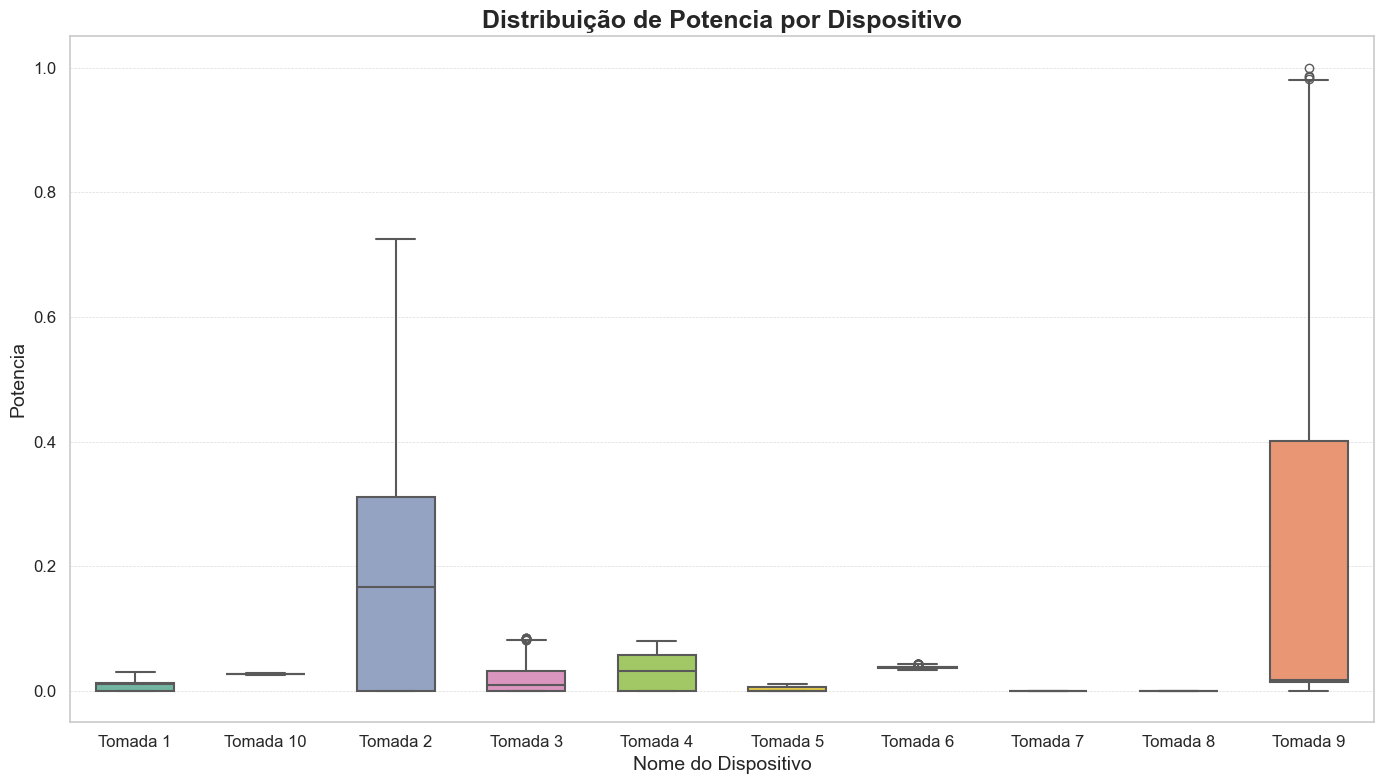

In [17]:
plot_iqr_outliers(df_sem_outliers_concatenado, 'potencia')

In [18]:

def split_dataframe_by_device(df, coluna_dispositivo='nome_do_dispositivo'):
    return {dispositivo: df[df[coluna_dispositivo] == dispositivo].drop(columns=[coluna_dispositivo]).reset_index(drop=True) for dispositivo in df[coluna_dispositivo].unique()}

dfs = split_dataframe_by_device(df_sem_outliers_concatenado)
dftomada = dfs['Tomada 10']

In [26]:
dftomada.head()
#dftomada['dia_da_semana'] = dftomada['dia_da_semana'].apply(lambda x: DIAS.index(x))
dftomada

,hora,dia,mes,dia_da_semana,corrente,potencia,voltagem,uso_dia,periodo
0,0,1,4,Monday,0.065656,0.027952,0.648942,1.000000,madrugada
1,0,1,6,Saturday,0.065573,0.028167,0.824509,0.818182,madrugada
2,0,1,7,Monday,0.063350,0.027228,0.703603,1.000000,madrugada
3,0,2,4,Tuesday,0.065257,0.026906,0.536764,0.818182,madrugada
4,0,2,5,Thursday,0.066624,0.027764,0.376165,0.727273,madrugada
...,...,...,...,...,...,...,...,...,...
2676,23,30,4,Tuesday,0.066624,0.026960,0.439322,0.818182,noite
2677,23,30,5,Thursday,0.066380,0.027793,0.730294,0.727273,noite
2678,23,30,6,Sunday,0.061987,0.027649,0.677771,0.818182,noite
2679,23,31,3,Sunday,0.064550,0.027304,0.624926,0.818182,noite


# ARIMA

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data (assuming it's in a CSV file)
data = dftomada.copy()
data.shape


(2681, 9)

In [28]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns) 

Non-numeric columns: Index(['dia_da_semana', 'periodo'], dtype='object')


# ARIMA DO JOAO

In [29]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error




data = dfs['Tomada 2'].copy()
data['dia_da_semana'] = data['dia_da_semana'].apply(lambda x: DIAS.index(x))
data['year'] = 2024
# Renomeia as colunas para os nomes esperados
data.rename(columns={'ano': 'year', 'mes': 'month', 'dia': 'day', 'hora': 'hour'}, errors='ignore', inplace=True)

# Cria a coluna datetime
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Ordena pelo datetime
data = data.sort_values('datetime')

# Converte 'periodo' em variáveis dummies
data = pd.get_dummies(data, columns=['periodo'])

# Define datetime como índice
data.set_index('datetime', inplace=True)

# Remove colunas desnecessárias
data.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

# Garante que todas as colunas são numéricas
data = data.apply(pd.to_numeric)

# Separa as features e a variável alvo
X = data.drop('potencia', axis=1)
y = data['potencia']

# Divide em conjuntos de treino e teste
split_point = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
X_test = X_test.astype(float)
X_train = X_train.astype(float)
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

Iniciando a busca pelos melhores parâmetros...
Testando ordem (0, 0, 0) | MSE: 0.0008
Testando ordem (0, 0, 1) | MSE: 0.0008
Testando ordem (0, 0, 2) | MSE: 0.0008
Testando ordem (0, 0, 3) | MSE: 0.0008
Testando ordem (0, 1, 0) | MSE: 0.0010
Testando ordem (0, 1, 1) | MSE: 0.0010
Testando ordem (0, 1, 2) | MSE: 0.0009
Testando ordem (0, 1, 3) | MSE: 0.0009
Testando ordem (0, 2, 0) | MSE: 43.1404
Testando ordem (0, 2, 1) | MSE: 0.0012
Testando ordem (0, 2, 2) | MSE: 0.0012
Testando ordem (0, 2, 3) | MSE: 0.0010
Testando ordem (1, 0, 0) | MSE: 0.0009
Testando ordem (1, 0, 1) | MSE: 0.0009
Testando ordem (1, 0, 2) | MSE: 0.0009
Testando ordem (1, 0, 3) | MSE: 0.0009
Testando ordem (1, 1, 0) | MSE: 0.0010
Testando ordem (1, 1, 1) | MSE: 0.0010
Testando ordem (1, 1, 2) | MSE: 0.0009
Testando ordem (1, 1, 3) | MSE: 0.0009
Testando ordem (1, 2, 0) | MSE: 38.0619
Testando ordem (1, 2, 1) | MSE: 0.0012
Testando ordem (1, 2, 2) | MSE: 0.0012
Testando ordem (1, 2, 3) | MSE: 0.0010
Testando ordem 

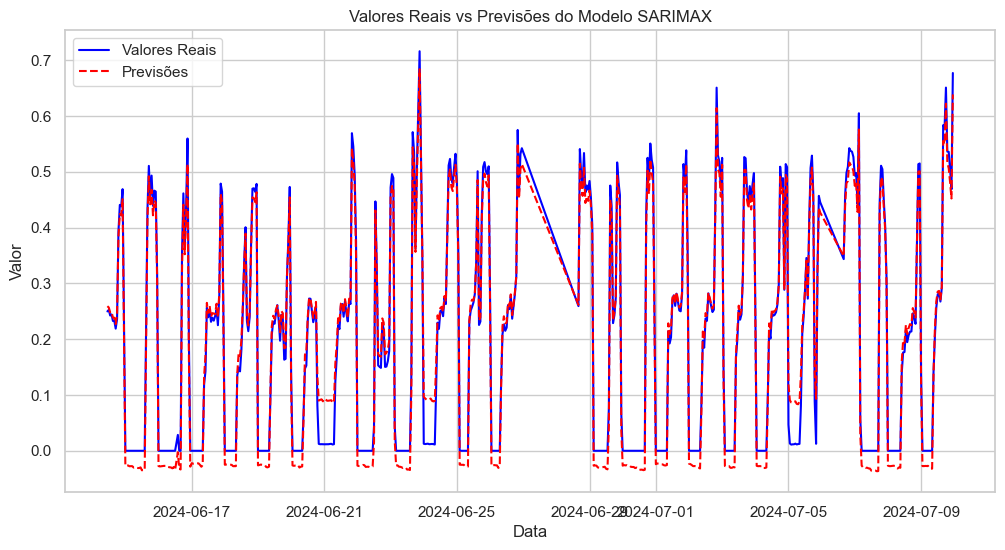

In [30]:
import itertools
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Suprimir avisos para clareza
warnings.filterwarnings("ignore")

# Supondo que y_train, X_train, y_test, X_test, split_point e data já estejam definidos

# Inicializar os escaladores
scaler_y = StandardScaler()
scaler_X = StandardScaler()

# Normalizar y_train e y_test
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Normalizar X_train e X_test se existirem variáveis exógenas
if X_train is not None and X_test is not None:
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
else:
    X_train_scaled = None
    X_test_scaled = None

# Definir intervalos para p, d, q
p = range(0, 4)  # p: autoregressivo
d = range(0, 3)  # d: diferença
q = range(0, 4)  # q: média móvel

# Gerar todas as combinações possíveis de p, d, q
pdq = list(itertools.product(p, d, q))

# Inicializar variáveis para armazenar os melhores parâmetros e o menor MSE
best_order = None
lowest_mse = float('inf')

# Lista para armazenar resultados
results = []

print("Iniciando a busca pelos melhores parâmetros...")

# Iterar sobre todas as combinações de p, d, q
for order in pdq:
    try:
        # Definir o modelo SARIMAX com a combinação atual de parâmetros
        model = SARIMAX(
            y_train_scaled,
            exog=X_train_scaled,
            order=order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)
        
        # Prever sobre o conjunto de teste
        start = split_point
        end_point = len(data) - 1
        y_pred_scaled = model_fit.predict(start=start, end=end_point, exog=X_test_scaled)
        
        # Inverter a normalização para obter os valores reais
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
        y_true = y_test.values  # Supondo que y_test seja um pandas Series
        
        # Calcular o MSE
        mse = mean_squared_error(y_true, y_pred)
        
        # Armazenar os resultados
        results.append({'order': order, 'mse': mse})
        
        # Verificar se este é o menor MSE encontrado até agora
        if mse < lowest_mse:
            lowest_mse = mse
            best_order = order
        
        print(f"Testando ordem {order} | MSE: {mse:.4f}")
        
    except Exception as e:
        # Se o modelo não puder ser ajustado, continuar
        print(f"Ordem {order} falhou: {e}")
        continue

print("\nBusca concluída.")
print(f"Melhor ordem encontrada: {best_order} com MSE: {lowest_mse:.4f}")

# Ajustar o modelo final com a melhor ordem encontrada
final_model = SARIMAX(
    y_train_scaled,
    exog=X_train_scaled,
    order=best_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
final_model_fit = final_model.fit(disp=False)

# Prever sobre o conjunto de teste
y_pred_scaled_final = final_model_fit.predict(start=start, end=end_point, exog=X_test_scaled)
y_pred_final = scaler_y.inverse_transform(y_pred_scaled_final.reshape(-1, 1)).flatten()

# Calcular o MSE final
final_mse = mean_squared_error(y_test, y_pred_final)
print(f'\nMSE do modelo final: {final_mse:.4f}')

# Plotar os valores reais vs previsões
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Valores Reais', color='blue')
plt.plot(y_test.index, y_pred_final, label='Previsões', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Valores Reais vs Previsões do Modelo SARIMAX')
plt.legend()
plt.show()


Mean Squared Error: 5.445460973486215e-06


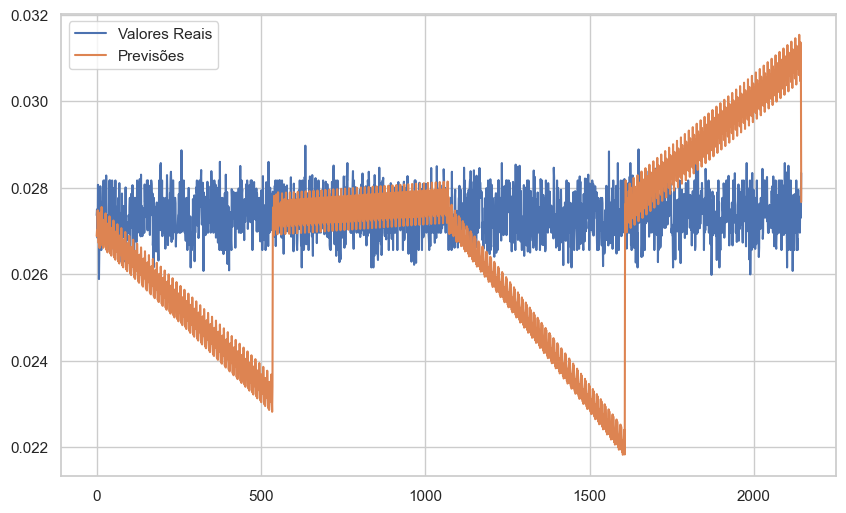

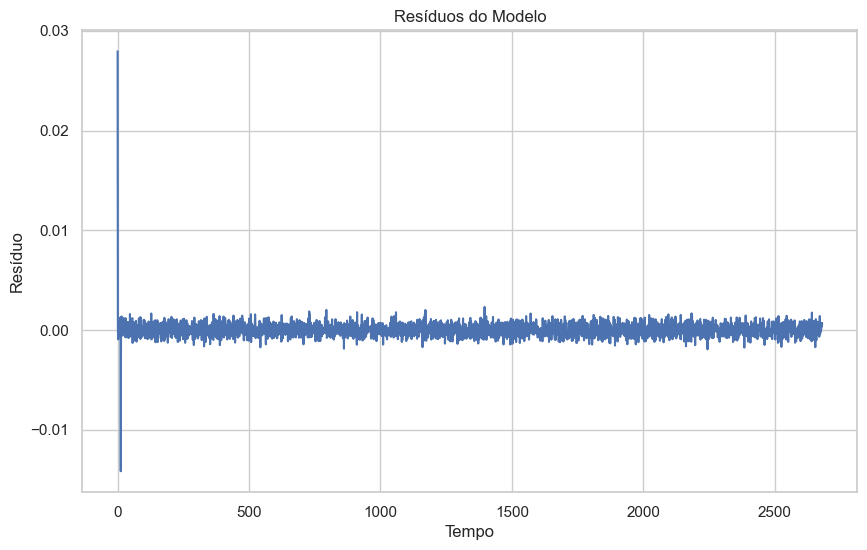

In [34]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Função para realizar validação cruzada em blocos
def time_series_cross_validation(data, order, seasonal_order, exog=None, n_splits=5):
    n = len(data)
    fold_size = n // n_splits
    predictions = []
    true_values = []

    for i in range(n_splits):
        train_end = (i + 1) * fold_size
        test_start = train_end
        test_end = test_start + fold_size
        
        train = data[:train_end]
        test = data[test_start:test_end]
        
        if exog is not None:
            exog_train = exog[:train_end]
            exog_test = exog[test_start:test_end]
        else:
            exog_train = exog_test = None
        
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order, exog=exog_train)
        model_fit = model.fit(disp=False)
        
        if exog_test is not None:
            preds = model_fit.forecast(steps=len(test), exog=exog_test)
        else:
            preds = model_fit.forecast(steps=len(test))
        
        predictions.extend(preds)
        true_values.extend(test)

    return np.array(predictions), np.array(true_values)

# Função para plotar resíduos
def plot_residuals(residuals):
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title('Resíduos do Modelo')
    plt.xlabel('Tempo')
    plt.ylabel('Resíduo')
    plt.show()

# Exemplo de uso
# Carregue seus dados de série temporal
data = dftomada.copy()

# Parâmetros do modelo
order = (1, 1, 1)  # ARIMA(p,d,q)
seasonal_order = (1, 1, 1, 12)  # SARIMA(P,D,Q,s)

# Realizando a validação cruzada
predictions, true_values = time_series_cross_validation(data['potencia'], order, seasonal_order)

# Calculando o erro
mse = mean_squared_error(true_values, predictions)
print(f'Mean Squared Error: {mse}')

# Plotando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.plot(true_values, label='Valores Reais')
plt.plot(predictions, label='Previsões')
plt.legend()
plt.show()

# Ajustando o modelo final
final_model = SARIMAX(data['potencia'], order=order, seasonal_order=seasonal_order)
final_fit = final_model.fit(disp=False)

# Plotando resíduos
plot_residuals(final_fit.resid)

# Certifique-se de que seus dados exógenos não estejam vazando informações futuras


Iniciando a busca pelos melhores parâmetros com validação cruzada...
Testando ordem (0, 0, 0) | MSE Médio: 0.0010
Testando ordem (0, 0, 1) | MSE Médio: 0.0010
Testando ordem (0, 0, 2) | MSE Médio: 0.0010
Testando ordem (0, 0, 3) | MSE Médio: 0.0010
Testando ordem (0, 1, 0) | MSE Médio: 0.0020
Testando ordem (0, 1, 1) | MSE Médio: 0.0020
Testando ordem (0, 1, 2) | MSE Médio: 0.0019
Testando ordem (0, 1, 3) | MSE Médio: 0.0018
Testando ordem (0, 2, 0) | MSE Médio: 0.6358
Testando ordem (0, 2, 1) | MSE Médio: 0.0021
Testando ordem (0, 2, 2) | MSE Médio: 0.0021
Testando ordem (0, 2, 3) | MSE Médio: 0.0020
Testando ordem (1, 0, 0) | MSE Médio: 0.0009
Testando ordem (1, 0, 1) | MSE Médio: 0.0009
Testando ordem (1, 0, 2) | MSE Médio: 0.0009
Testando ordem (1, 0, 3) | MSE Médio: 0.0009
Testando ordem (1, 1, 0) | MSE Médio: 0.0020
Testando ordem (1, 1, 1) | MSE Médio: 0.0010
Testando ordem (1, 1, 2) | MSE Médio: 0.0011
Testando ordem (1, 1, 3) | MSE Médio: 0.0010
Testando ordem (1, 2, 0) | MSE 

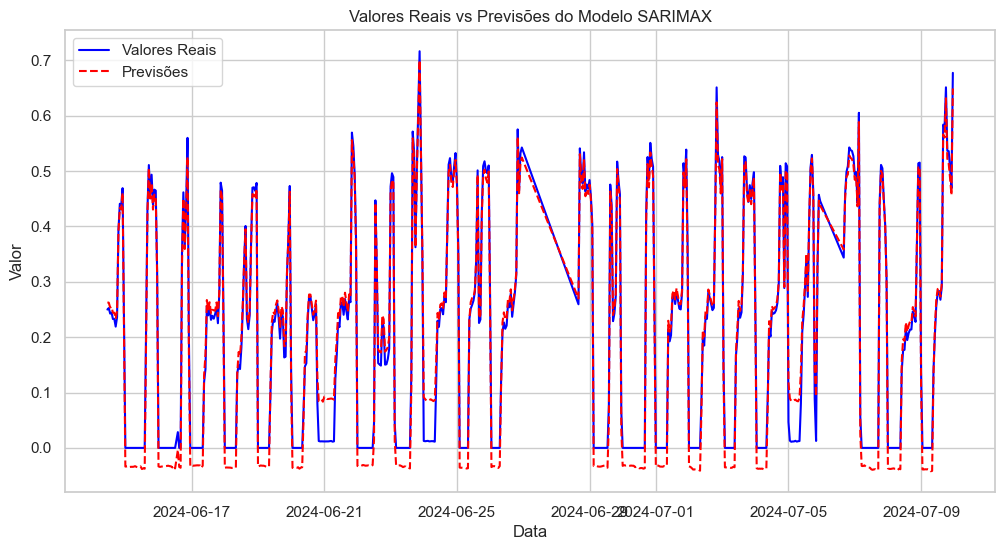

In [35]:
from sklearn.model_selection import TimeSeriesSplit

# Definir TimeSeriesSplit com 5 divisões
tscv = TimeSeriesSplit(n_splits=5)

# Inicializar variáveis para armazenar resultados
best_order = None
lowest_mse = float('inf')
results = []

print("Iniciando a busca pelos melhores parâmetros com validação cruzada...")

# Iterar sobre todas as combinações de p, d, q
for order in pdq:
    mse_values = []
    try:
        for train_index, test_index in tscv.split(y_train_scaled):
            y_train_cv, y_test_cv = y_train_scaled[train_index], y_train_scaled[test_index]
            if X_train_scaled is not None:
                X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
            else:
                X_train_cv, X_test_cv = None, None
            
            # Definir o modelo SARIMAX com a combinação atual de parâmetros
            model = SARIMAX(
                y_train_cv,
                exog=X_train_cv,
                order=order,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            model_fit = model.fit(disp=False)
            
            # Prever sobre o conjunto de teste
            y_pred_scaled_cv = model_fit.predict(start=len(y_train_cv), end=len(y_train_cv)+len(y_test_cv)-1, exog=X_test_cv)
            y_pred_cv = scaler_y.inverse_transform(y_pred_scaled_cv.reshape(-1, 1)).flatten()
            y_true_cv = scaler_y.inverse_transform(y_test_cv.reshape(-1, 1)).flatten()
            
            # Calcular o MSE
            mse_cv = mean_squared_error(y_true_cv, y_pred_cv)
            mse_values.append(mse_cv)
        
        # Calcular o MSE médio para a combinação atual de parâmetros
        avg_mse = np.mean(mse_values)
        results.append({'order': order, 'mse': avg_mse})
        
        # Verificar se este é o menor MSE encontrado até agora
        if avg_mse < lowest_mse:
            lowest_mse = avg_mse
            best_order = order
        
        print(f"Testando ordem {order} | MSE Médio: {avg_mse:.4f}")
        
    except Exception as e:
        # Se o modelo não puder ser ajustado, continuar
        print(f"Ordem {order} falhou: {e}")
        continue

print("\nBusca concluída.")
print(f"Melhor ordem encontrada: {best_order} com MSE Médio: {lowest_mse:.4f}")

# Ajustar o modelo final com a melhor ordem encontrada
final_model = SARIMAX(
    y_train_scaled,
    exog=X_train_scaled,
    order=best_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
final_model_fit = final_model.fit(disp=False)

# Prever sobre o conjunto de teste
y_pred_scaled_final = final_model_fit.predict(start=start, end=end_point, exog=X_test_scaled)
y_pred_final = scaler_y.inverse_transform(y_pred_scaled_final.reshape(-1, 1)).flatten()

# Calcular o MSE final
final_mse = mean_squared_error(y_test, y_pred_final)
print(f'\nMSE do modelo final: {final_mse:.4f}')

# Plotar os valores reais vs previsões
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Valores Reais', color='blue')
plt.plot(y_test.index, y_pred_final, label='Previsões', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Valores Reais vs Previsões do Modelo SARIMAX')
plt.legend()
plt.show()


Iniciando a busca pelos melhores parâmetros com validação cruzada...
cheguei 823626609777.8967
Testando ordem (0, 0, 0) | MAPE Médio: 823626609777.8967
cheguei 619806399812.3066
Testando ordem (0, 0, 1) | MAPE Médio: 619806399812.3066
Testando ordem (0, 0, 2) | MAPE Médio: 635346831149.6378
Testando ordem (0, 0, 3) | MAPE Médio: 668039493379.7888
Testando ordem (0, 1, 0) | MAPE Médio: 80788155136115.6406
cheguei 0.6679510939425057
Testando ordem (0, 1, 1) | MAPE Médio: 0.6680
Testando ordem (0, 1, 2) | MAPE Médio: 0.6726
Testando ordem (0, 1, 3) | MAPE Médio: 0.6733
Testando ordem (0, 2, 0) | MAPE Médio: 4845589548022754.0000
Testando ordem (0, 2, 1) | MAPE Médio: 16774221642314.0039
Testando ordem (0, 2, 2) | MAPE Médio: 6152023329489.8594
Testando ordem (0, 2, 3) | MAPE Médio: 375314767630050.5000
Testando ordem (1, 0, 0) | MAPE Médio: 625406893705.7581
Testando ordem (1, 0, 1) | MAPE Médio: 604693057229.2961
Testando ordem (1, 0, 2) | MAPE Médio: 407724407381.0870
Testando ordem (1,

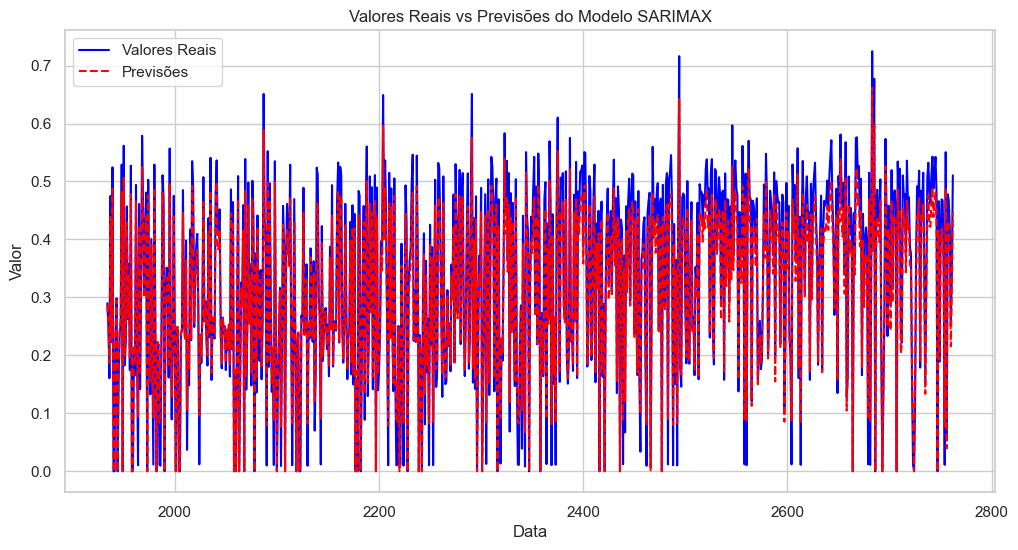

In [91]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

# Suprimir avisos para clareza
warnings.filterwarnings("ignore")

# Supondo que y_train, X_train, y_test, X_test, split_point e data já estejam definidos

# Inicializar os escaladores
scaler_y = StandardScaler()
scaler_X = StandardScaler()

# Normalizar y_train e y_test
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Normalizar X_train e X_test se existirem variáveis exógenas
if X_train is not None and X_test is not None:
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
else:
    X_train_scaled = None
    X_test_scaled = None

# Definir intervalos para p, d, q
p = range(0, 4)  # p: autoregressivo
d = range(0, 3)  # d: diferença
q = range(0, 4)  # q: média móvel

# Gerar todas as combinações possíveis de p, d, q
pdq = list(itertools.product(p, d, q))

# Inicializar variáveis para armazenar os melhores parâmetros e o menor MAPE
best_order = None
lowest_mape = float('inf')
results = []

print("Iniciando a busca pelos melhores parâmetros com validação cruzada...")

# Definir TimeSeriesSplit com 5 divisões
tscv = TimeSeriesSplit(n_splits=5)

# Iterar sobre todas as combinações de p, d, q
for order in pdq:
    mse_values = []
    try:
        for train_index, test_index in tscv.split(y_train_scaled):
            y_train_cv, y_test_cv = y_train_scaled[train_index], y_train_scaled[test_index]
            if X_train_scaled is not None:
                X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
            else:
                X_train_cv, X_test_cv = None, None
            
            # Definir o modelo SARIMAX com a combinação atual de parâmetros
            model = SARIMAX(
                y_train_cv,
                exog=X_train_cv,
                order=order,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            model_fit = model.fit(disp=False)
            
            # Prever sobre o conjunto de teste
            y_pred_scaled_cv = model_fit.predict(start=len(y_train_cv), end=len(y_train_cv)+len(y_test_cv)-1, exog=X_test_cv)
            y_pred_cv = scaler_y.inverse_transform(y_pred_scaled_cv.reshape(-1, 1)).flatten()
            y_true_cv = scaler_y.inverse_transform(y_test_cv.reshape(-1, 1)).flatten()
            
            # Ajustar valores negativos para zero
            y_pred_cv = np.maximum(y_pred_cv, 0)

            # Calcular o MAPE
            mape_cv = mean_absolute_percentage_error(y_true_cv, y_pred_cv)
            mse_values.append(mape_cv)
        
        # Calcular o MAPE médio para a combinação atual de parâmetros
        avg_mape = np.mean(mse_values)
        results.append({'order': order, 'mape': avg_mape})
        
        # Verificar se este é o menor MAPE encontrado até agora
        if avg_mape < lowest_mape:
            print("cheguei", avg_mape)
            lowest_mape = avg_mape
            best_order = order
        
        print(f"Testando ordem {order} | MAPE Médio: {avg_mape:.4f}")
        
    except Exception as e:
        # Se o modelo não puder ser ajustado, continuar
        print(f"Ordem {order} falhou: {e}")
        continue

print("\nBusca concluída.")
print(f"Melhor ordem encontrada: {best_order} com MAPE Médio: {lowest_mape:.4f}")

# Ajustar o modelo final com a melhor ordem encontrada
final_model = SARIMAX(
    y_train_scaled,
    exog=X_train_scaled,
    order=best_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
final_model_fit = final_model.fit(disp=False)

# Prever sobre o conjunto de teste
start = len(y_train_scaled)
end_point = start + len(y_test_scaled) - 1
y_pred_scaled_final = final_model_fit.predict(start=start, end=end_point, exog=X_test_scaled)

# Reverter a normalização
y_pred_final = scaler_y.inverse_transform(y_pred_scaled_final.reshape(-1, 1)).flatten()

# Ajustar valores negativos para zero
y_pred_final = np.maximum(y_pred_final, 0)

# Calcular o MAPE final
final_mape = mean_absolute_percentage_error(y_test, y_pred_final)
print(f'\nMAPE do modelo final: {final_mape:.4f}')

# Plotar os valores reais vs previsões
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Valores Reais', color='blue')
plt.plot(y_test.index, y_pred_final, label='Previsões', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Valores Reais vs Previsões do Modelo SARIMAX')
plt.legend()
plt.show()


In [77]:
from statsmodels.tsa.stattools import adfuller

def testar_estacionaridade(serie, titulo):
    resultado = adfuller(serie)
    print(f"\nTeste de Estacionaridade: {titulo}")
    print(f"Estatística ADF: {resultado[0]}")
    print(f"Valor p: {resultado[1]}")
    print("Conclusão: ", "Estacionária" if resultado[1] <= 0.05 else "Não estacionária")

# Testar a estacionaridade do y_train (original e normalizado)
testar_estacionaridade(y_train.values.flatten(), "y_train (original)")
testar_estacionaridade(y_train_scaled, "y_train_scaled")



Teste de Estacionaridade: y_train (original)
Estatística ADF: -3.021037456343873
Valor p: 0.03297592752121053
Conclusão:  Estacionária

Teste de Estacionaridade: y_train_scaled
Estatística ADF: -3.021037456343868
Valor p: 0.03297592752121099
Conclusão:  Estacionária


In [83]:
# Inverter a normalização
y_pred_final = scaler_y.inverse_transform(y_pred_scaled_final.reshape(-1, 1)).flatten()

# Verificar valores reais e previstos
print("Valores Reais:", y_test[:10].values.flatten())
print("Valores Previstos:", y_pred_final[:10])


Valores Reais: [0.2899163  0.24875262 0.16055046 0.47501207 0.22277598 0.52441885
 0.         0.         0.23166479 0.2983199 ]
Valores Previstos: [ 0.28499805  0.25120452  0.18467477  0.43523378  0.22905427  0.48699299
 -0.01179788 -0.01080566  0.23926688  0.29678664]


In [79]:
# Adicionar sazonalidade ao SARIMAX
model = SARIMAX(
    y_train_cv,
    exog=X_train_cv,
    order=order,
    seasonal_order=(1, 1, 1, 12),  # Ajuste para séries sazonais
    enforce_stationarity=False,
    enforce_invertibility=False
)


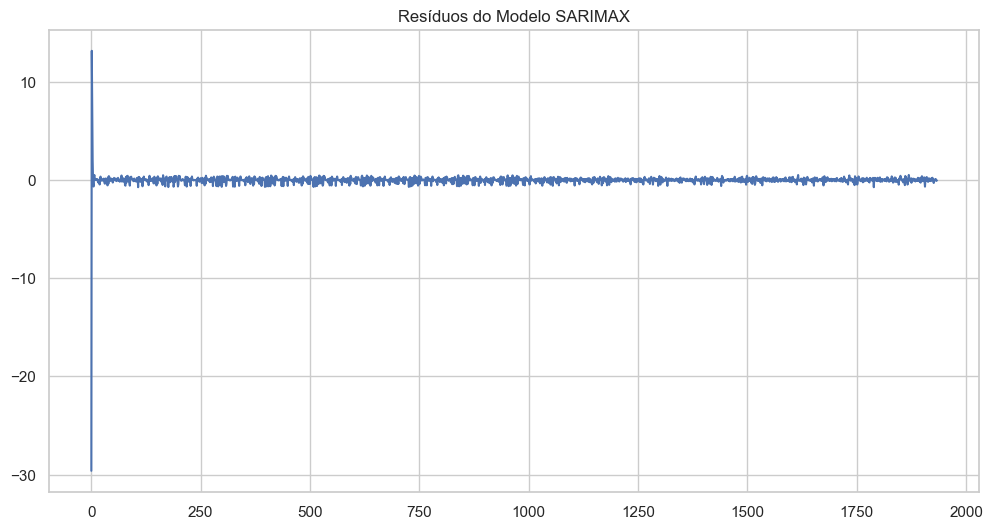

In [80]:
residuos = final_model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuos)
plt.title("Resíduos do Modelo SARIMAX")
plt.show()


In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

final_mse = mean_squared_error(y_test, y_pred_final)
final_mae = mean_absolute_error(y_test, y_pred_final)
final_rmse = root_mean_squared_error(y_test, y_pred_final)  
final_mape = mean_absolute_percentage_error(y_test, y_pred_final)       

print(f'MSE: {final_mse:.4f}')
print(f'MAE: {final_mae:.4f}')
print(f'RMSE: {final_rmse:.4f}')
print(f'MAPE: {final_mape:.4f}')

MSE: 0.0014
MAE: 0.0300
RMSE: 0.0370
MAPE: 0.4026


# FIM DO ARIMA DO JOAO

# INICIO KERAS

In [29]:
dado = dfs['Tomada 2'].copy()
dado

,hora,dia,mes,dia_da_semana,corrente,potencia,voltagem,uso_dia,periodo
0,0,1,4,Monday,0.223276,0.161623,0.409849,1.000000,madrugada
1,0,1,6,Saturday,0.524976,0.494311,0.595132,0.818182,madrugada
2,0,1,7,Monday,0.000000,0.000000,0.604154,1.000000,madrugada
3,0,2,4,Tuesday,0.454239,0.413273,0.432405,0.818182,madrugada
4,0,2,5,Thursday,0.000000,0.000000,0.254362,0.727273,madrugada
...,...,...,...,...,...,...,...,...,...
2758,23,30,4,Tuesday,0.508221,0.467166,0.331053,0.818182,noite
2759,23,30,5,Thursday,0.455020,0.417299,0.611070,0.727273,noite
2760,23,30,6,Sunday,0.272353,0.250627,0.497967,0.727273,noite
2761,23,31,3,Sunday,0.388640,0.339927,0.494101,0.727273,noite


In [ ]:
## Carregar o dataframe 'Tomada 2' da biblioteca dfs
#data = dfs['Tomada 2'].copy()
#
## Transformar a coluna 'periodo' em uma coluna categórica usando one-hot encoding
#data_periodo = pd.get_dummies(data['periodo'], prefix='periodo')
#data_diadasemana = pd.get_dummies(data['dia_da_semana'], prefix='dia_da_semana')
#data_total = pd.concat([data.drop(columns=['periodo', 'dia_da_semana']), data_periodo, data_diadasemana], axis=1)
## Exibir as primeiras linhas do DataFrame resultante
#data_periodo.head()
#
#data = data_total
#data


Validação Cruzada - Divisão 1/7
Epoch 1/50


c:\Users\Doriel\miniconda3\envs\arima_pesquisa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0685 - mae: 0.2078 - val_loss: 0.0297 - val_mae: 0.1420
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - mae: 0.1645 - val_loss: 0.0314 - val_mae: 0.1549
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0346 - mae: 0.1573 - val_loss: 0.0308 - val_mae: 0.1516
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0345 - mae: 0.1595 - val_loss: 0.0303 - val_mae: 0.1485
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0336 - mae: 0.1568 - val_loss: 0.0296 - val_mae: 0.1434
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0317 - mae: 0.1518 - val_loss: 0.0292 - val_mae: 0.1406
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0332 - mae: 0.1594 - val_loss: 0.0293 - val_mae: 0.1427
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0347 - mae: 0.1554 - val_loss: 0.0289 - val_mae: 0.1370
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0328 - mae: 0.1560 - val_loss: 0

c:\Users\Doriel\miniconda3\envs\arima_pesquisa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0363 - mae: 0.1454 - val_loss: 0.0106 - val_mae: 0.0904
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0295 - mae: 0.1408 - val_loss: 0.0076 - val_mae: 0.0790
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0269 - mae: 0.1340 - val_loss: 0.0062 - val_mae: 0.0618
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0247 - mae: 0.1156 - val_loss: 0.0065 - val_mae: 0.0682
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0278 - mae: 0.1309 - val_loss: 0.0061 - val_mae: 0.0593
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0243 - mae: 0.1208 - val_loss: 0.0062 - val_mae: 0.0621
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0267 - mae: 0.1317 - val_loss: 0.0064 - val_mae: 0.0660
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0268 - mae: 0.1340 - val_loss: 0.0061 - val_mae: 0.0577
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0244 - mae: 0.

c:\Users\Doriel\miniconda3\envs\arima_pesquisa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0251 - mae: 0.1166 - val_loss: 0.0059 - val_mae: 0.0535
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0224 - mae: 0.1045 - val_loss: 0.0062 - val_mae: 0.0502
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0198 - mae: 0.1001 - val_loss: 0.0062 - val_mae: 0.0497
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186 - mae: 0.0948 - val_loss: 0.0062 - val_mae: 0.0510
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0172 - mae: 0.0960 - val_loss: 0.0056 - val_mae: 0.0590
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0182 - mae: 0.1024 - val_loss: 0.0060 - val_mae: 0.0590
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0194 - mae: 0.1017 - val_loss: 0.0065 - val_mae: 0.0488
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0171 - mae: 0.0921 - val_loss: 0.0056 - val_mae: 0.0554
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0182 - mae: 0.

c:\Users\Doriel\miniconda3\envs\arima_pesquisa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0197 - mae: 0.1023 - val_loss: 0.0242 - val_mae: 0.1264
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0166 - mae: 0.0914 - val_loss: 0.0235 - val_mae: 0.1260
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0171 - mae: 0.0979 - val_loss: 0.0230 - val_mae: 0.1249
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0162 - mae: 0.0950 - val_loss: 0.0214 - val_mae: 0.1223
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0176 - mae: 0.0983 - val_loss: 0.0233 - val_mae: 0.1248
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0157 - mae: 0.0872 - val_loss: 0.0214 - val_mae: 0.1230
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0152 - mae: 0.0899 - val_loss: 0.0209 - val_mae: 0.1217
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0145 - mae: 0.0900 - val_loss: 0.0223 - val_mae: 0.1238
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0151 - mae: 0.

c:\Users\Doriel\miniconda3\envs\arima_pesquisa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0198 - mae: 0.1099 - val_loss: 0.0231 - val_mae: 0.1203
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0160 - mae: 0.0961 - val_loss: 0.0278 - val_mae: 0.1393
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0153 - mae: 0.0969 - val_loss: 0.0226 - val_mae: 0.1228
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0143 - mae: 0.0875 - val_loss: 0.0216 - val_mae: 0.1194
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0151 - mae: 0.0958 - val_loss: 0.0213 - val_mae: 0.1176
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0156 - mae: 0.0918 - val_loss: 0.0219 - val_mae: 0.1210
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0149 - mae: 0.0922 - val_loss: 0.0230 - val_mae: 0.1251
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0154 - mae: 0.0941 - val_loss: 0.0216 - val_mae: 0.1191
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0154 - mae: 0.

c:\Users\Doriel\miniconda3\envs\arima_pesquisa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0189 - mae: 0.1080 - val_loss: 0.0252 - val_mae: 0.1223
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0180 - mae: 0.1044 - val_loss: 0.0254 - val_mae: 0.1219
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0177 - mae: 0.1046 - val_loss: 0.0272 - val_mae: 0.1289
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0160 - mae: 0.0986 - val_loss: 0.0275 - val_mae: 0.1305
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0162 - mae: 0.1019 - val_loss: 0.0240 - val_mae: 0.1190
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0160 - mae: 0.0970 - val_loss: 0.0253 - val_mae: 0.1223
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0149 - mae: 0.0946 - val_loss: 0.0230 - val_mae: 0.1193
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0153 - mae: 0.0943 - val_loss: 0.0324 - val_mae: 0.1448
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0161 - mae: 0.

c:\Users\Doriel\miniconda3\envs\arima_pesquisa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0234 - mae: 0.1209 - val_loss: 0.0363 - val_mae: 0.1580
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0203 - mae: 0.1100 - val_loss: 0.0315 - val_mae: 0.1487
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0192 - mae: 0.1085 - val_loss: 0.0396 - val_mae: 0.1620
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0169 - mae: 0.0986 - val_loss: 0.0334 - val_mae: 0.1495
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0169 - mae: 0.0982 - val_loss: 0.0345 - val_mae: 0.1515
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0180 - mae: 0.1042 - val_loss: 0.0413 - val_mae: 0.1661
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0181 - mae: 0.1054 - val_loss: 0.0330 - val_mae: 0.1482
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0170 - mae: 0.0999 - val_loss: 0.0371 - val_mae: 0.1565
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0162 - mae: 0.

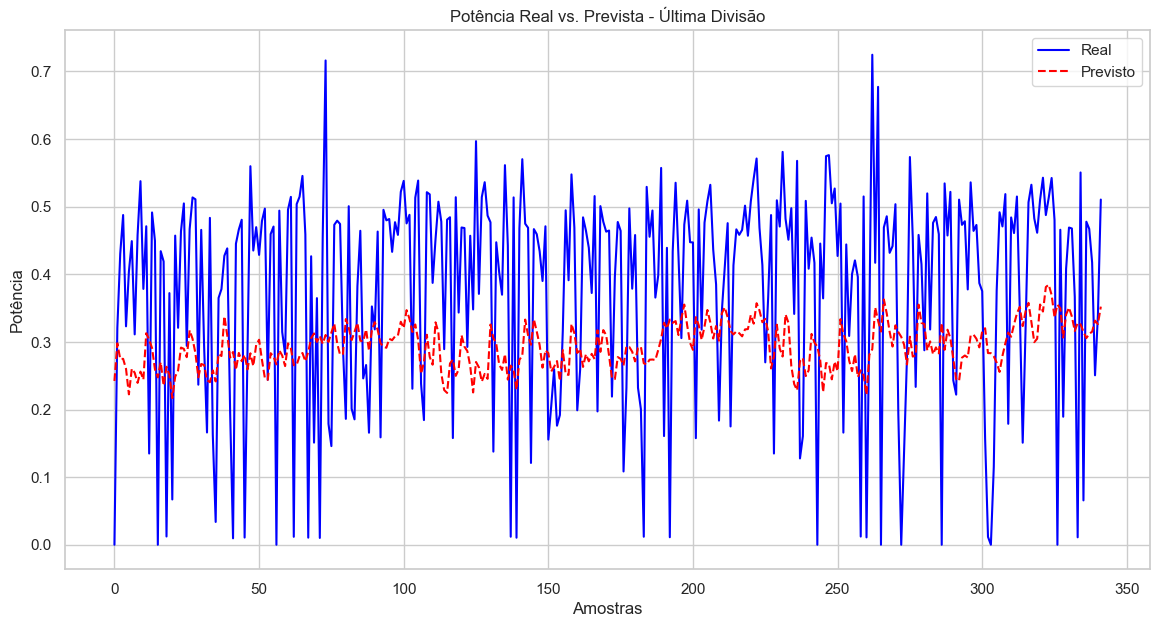

In [28]:

#DORIEL
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# Ajustar a fórmula do MAPE para evitar divisão por zero
def calculate_mape(y_true, y_pred, epsilon=1e-10):
    """
    Calcula o MAPE evitando divisão por zero, adicionando um pequeno valor epsilon ao denominador.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon))) * 100

# Dados de entrada (substitua pelo carregamento real)
data = dfs['Tomada 2'].copy()

# Passo 1: Preparação dos Dados
data = data.sort_index()  # Ordenar pela coluna datetime

# Tratar variáveis categóricas e booleanas
if 'periodo' in data.columns:
    data = pd.get_dummies(data, columns=['dia_da_semana', 'periodo'], drop_first=True)
else:
    data = pd.get_dummies(data, columns=['dia_da_semana'], drop_first=True)

period_columns = ['periodo_madrugada', 'periodo_manhã', 'periodo_noite', 'periodo_tarde']
existing_period_columns = [col for col in period_columns if col in data.columns]
data[existing_period_columns] = data[existing_period_columns].astype(bool).astype(int)

# Seleção de features e target
features = data.drop(['potencia'], axis=1).columns
target = 'potencia'

# Normalizar as features
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data_scaled[features])

# Função para criar sequências
def create_sequences(data, target_column, timesteps=24):
    X = []
    y = []
    for i in range(timesteps, len(data)):
        X.append(data.iloc[i-timesteps:i].values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

# Criar sequências
X, y = create_sequences(data_scaled, target_column=target, timesteps=24)

# Configuração do TimeSeriesSplit
n_splits = 7
tscv = TimeSeriesSplit(n_splits=n_splits)

# Inicializar listas de métricas
mse_scores = []
mae_scores = []
rmse_scores = []
mape_scores = []

# Validação cruzada
split_num = 1
for train_index, test_index in tscv.split(X):
    print(f"\nValidação Cruzada - Divisão {split_num}/{n_splits}")
    split_num += 1

    # Separar os dados de treinamento e teste
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Construção do modelo LSTM
    model = Sequential([
        LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(64, activation='relu', return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    # Compilar o modelo
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

    # Treinamento
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

    # Previsões
    y_pred = model.predict(X_test).flatten()

    # Ajustar valores negativos para zero
    y_pred = np.maximum(y_pred, 0)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = calculate_mape(y_test, y_pred)  # Usar função ajustada para o MAPE

    # Armazenar métricas
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)

    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

# Resultados finais
print("\nResultados da Validação Cruzada:")
print(f"Média do MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Média do MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"Média do RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"Média do MAPE: {np.mean(mape_scores):.2f}% ± {np.std(mape_scores):.2f}%")

# Visualização
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Real', color='blue')
plt.plot(y_pred, label='Previsto', color='red', linestyle='--')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Potência')
plt.title('Potência Real vs. Prevista - Última Divisão')
plt.show()


In [53]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# Supondo que o dataframe se chame `data` e já esteja carregado
# Caso contrário, carregue o dataframe usando pd.read_csv ou outro método apropriado
# Exemplo:
data = dfs['Tomada 2'].copy()

# Passo 1: Preparação dos Dados

# a. Ordenar o dataframe pela coluna datetime
data = data.sort_index()

# b. Tratar variáveis categóricas e booleanas

# One-Hot Encoding para 'dia_da_semana'
data = pd.get_dummies(data, columns=['dia_da_semana'], drop_first=True)

# Convertendo colunas booleanas para inteiros
period_columns = ['periodo_madrugada', 'periodo_manhã', 'periodo_noite', 'periodo_tarde']
data[period_columns] = data[period_columns].astype(int)

# c. Selecionar as features e o target
# Remover as colunas originais 'corrente' e 'voltagem' se não forem necessárias
# No caso de LSTM, geralmente usamos as séries completas, então manteremos 'corrente' e 'voltagem'

# Definir as features e o target
features = data.drop(['potencia'], axis=1).columns
target = 'potencia'

# d. Normalizar as features
scaler = StandardScaler()

# Ajustar o scaler nas features (exceto o target)
data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data_scaled[features])

# e. Criar sequências para LSTM
def create_sequences(data, target_column, timesteps=24):
    X = []
    y = []
    for i in range(timesteps, len(data)):
        X.append(data.iloc[i-timesteps:i].values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

# Aplicar a função para criar sequências
X, y = create_sequences(data_scaled, target_column=target, timesteps=24)

print(f"Formato de X: {X.shape}")  # Deve ser (samples, timesteps, features)
print(f"Formato de y: {y.shape}")  # Deve ser (samples,)

# f. Dividir os dados em treinamento e teste mantendo a ordem temporal
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Passo 2: Construção do Modelo LSTM

# Definir a arquitetura do modelo
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Saída para regressão
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumo do modelo
model.summary()

# Passo 3: Treinamento do Modelo

# Definir o callback de Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Número de épocas sem melhoria para parar
    restore_best_weights=True,
    verbose=1
)

# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=1000,  # Número máximo de épocas
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Passo 4: Avaliação do Modelo

# Avaliar o modelo no conjunto de teste
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'\nMSE no conjunto de teste: {loss}')
print(f'MAE no conjunto de teste: {mae}')

# Passo 5: Fazer Previsões

y_pred = model.predict(X_test)

# Passo 6: Visualização dos Resultados

plt.figure(figsize=(14,7))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Previsto')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Potência')
plt.title('Potência Real vs. Prevista')
plt.show()

# Passo 7: Análise de Resíduos (Opcional)

residuals = y_test - y_pred.flatten()

plt.figure(figsize=(14,7))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Potência Prevista')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Potência Prevista')
plt.show()


KeyError: "None of [Index(['periodo_madrugada', 'periodo_manhã', 'periodo_noite', 'periodo_tarde'], dtype='object')] are in the [columns]"

Formato de X: (2739, 24, 16)
Formato de y: (2739,)
X_train shape: (2191, 24, 16)
X_test shape: (548, 24, 16)
y_train shape: (2191,)
y_test shape: (548,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 128)        │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,761 (491.25 KB)

 Trainable params: 125,761 (491.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0223 - mae: 0.1169 - val_loss: 0.0331 - val_mae: 0.1413
Epoch 2/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0192 - mae: 0.1079 - val_loss: 0.0335 - val_mae: 0.1420
Epoch 3/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0179 - mae: 0.1037 - val_loss: 0.0351 - val_mae: 0.1461
Epoch 4/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0161 - mae: 0.0994 - val_loss: 0.0283 - val_mae: 0.1345
Epoch 5/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0169 - mae: 0.1013 - val_loss: 0.0319 - val_mae: 0.1387
Epoch 6/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0170 - mae: 0.1011 - val_loss: 0.0313 - val_mae: 0.1378
Epoch 7/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0161 - mae: 0.0963 - val_loss: 0.0314 - val_mae: 0.1380
Epoch 8/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0158 - mae: 0.0951 - val_loss: 0.0308 - val_mae: 0.1374
Epoch 9/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/

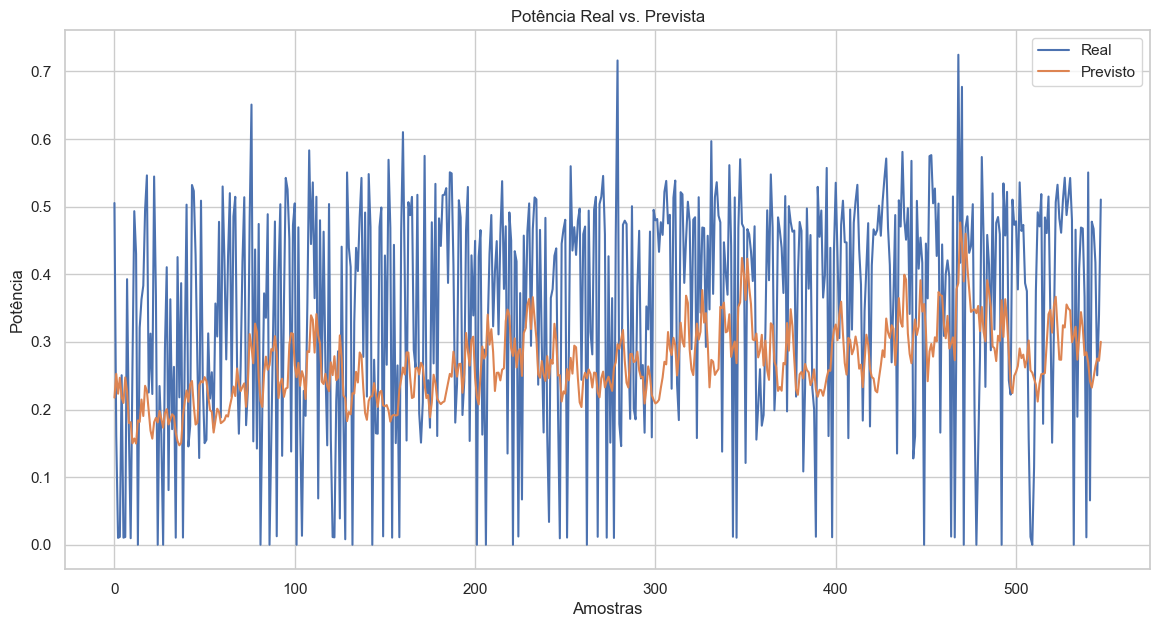

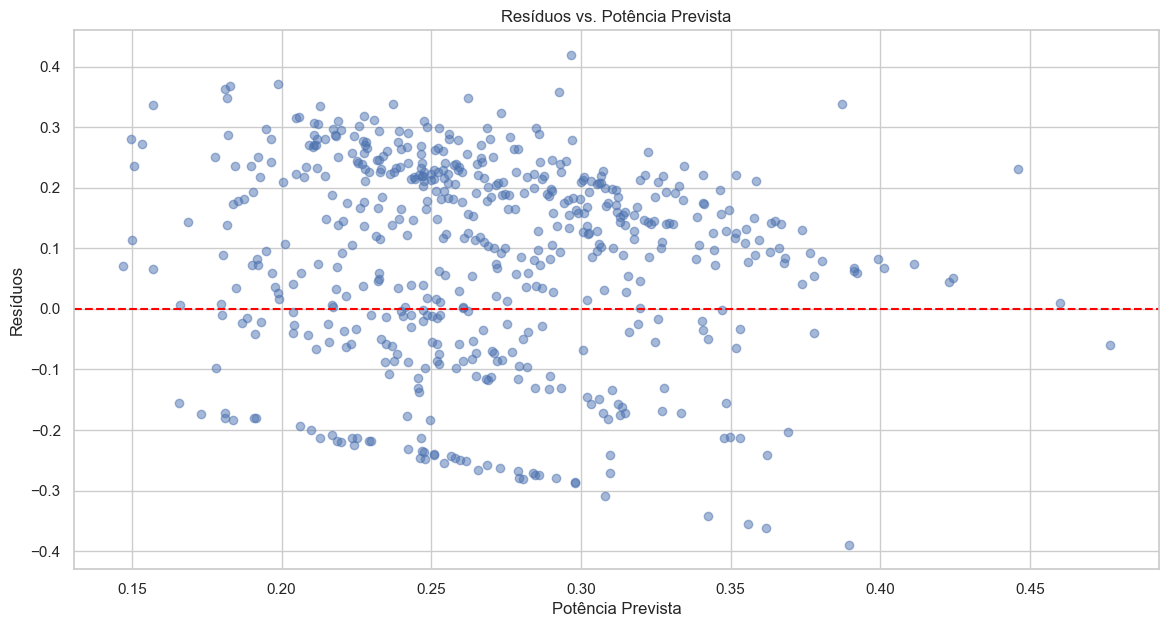

In [61]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# Supondo que o dataframe se chame `data` e já esteja carregado
data = dfs['Tomada 2'].copy()

# Passo 1: Preparação dos Dados

# a. Ordenar o dataframe pela coluna datetime
data = data.sort_index()

# b. Tratar variáveis categóricas e booleanas

# One-Hot Encoding para 'dia_da_semana' e 'periodo'
data = pd.get_dummies(data, columns=['dia_da_semana', 'periodo'], drop_first=True)

# Garantindo que as colunas booleanas contenham apenas valores booleanos antes da conversão
period_columns = ['periodo_madrugada', 'periodo_manhã', 'periodo_noite', 'periodo_tarde']
existing_period_columns = [col for col in period_columns if col in data.columns]

for col in existing_period_columns:
    data[col] = data[col].astype(bool)

# Convertendo colunas booleanas para inteiros
data[existing_period_columns] = data[existing_period_columns].astype(int)

# c. Selecionar as features e o target
# Definir as features e o target
features = data.drop(['potencia'], axis=1).columns
target = 'potencia'

# d. Normalizar as features
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data_scaled[features])

# e. Criar sequências para LSTM
def create_sequences(data, target_column, timesteps=24):
    X = []
    y = []
    for i in range(timesteps, len(data)):
        X.append(data.iloc[i-timesteps:i].values)
        y.append(data.iloc[i][target_column])
    return np.array(X), np.array(y)

# Aplicar a função para criar sequências
X, y = create_sequences(data_scaled, target_column=target, timesteps=24)

print(f"Formato de X: {X.shape}")  # Deve ser (samples, timesteps, features)
print(f"Formato de y: {y.shape}")  # Deve ser (samples,)

# f. Dividir os dados em treinamento e teste mantendo a ordem temporal
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Passo 2: Construção do Modelo LSTM

# Definir a arquitetura do modelo
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Saída para regressão
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumo do modelo
model.summary()

# Passo 3: Treinamento do Modelo

# Definir o callback de Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Número de épocas sem melhoria para parar
    restore_best_weights=True,
    verbose=1
)

# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=1000,  # Número máximo de épocas
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Passo 4: Avaliação do Modelo

# Avaliar o modelo no conjunto de teste
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'\nMSE no conjunto de teste: {loss}')
print(f'MAE no conjunto de teste: {mae}')

# Passo 5: Fazer Previsões

y_pred = model.predict(X_test)

# Passo 6: Visualização dos Resultados

plt.figure(figsize=(14,7))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Previsto')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Potência')
plt.title('Potência Real vs. Prevista')
plt.show()

# Passo 7: Análise de Resíduos (Opcional)

residuals = y_test - y_pred.flatten()

plt.figure(figsize=(14,7))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Potência Prevista')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Potência Prevista')
plt.show()


In [47]:
!pip install  tensorflow

   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   - -------------------------------------- 11.3/390.2 MB 64.0 MB/s eta 0:00:06
   -- ------------------------------------- 28.0/390.2 MB 71.1 MB/s eta 0:00:06
   ----- ---------------------------------- 50.3/390.2 MB 84.3 MB/s eta 0:00:05
   ------- -------------------------------- 73.1/390.2 MB 91.4 MB/s eta 0:00:04
   --------- ------------------------------ 95.9/390.2 MB 95.7 MB/s eta 0:00:04
   ------------ -------------------------- 120.3/390.2 MB 98.5 MB/s eta 0:00:03
   ------------- ------------------------ 143.4/390.2 MB 100.7 MB/s eta 0:00:03
   ---------------- --------------------- 166.2/390.2 MB 102.1 MB/s eta 0:00:03
   ------------------ ------------------- 190.8/390.2 MB 103.4 MB/s eta 0:00:02
   -------------------- ----------------- 213.6/390.2 MB 104.2 MB/s eta 0:00:02
   ----------------------- -------------- 237.2/390.2 MB 105.3 MB/s eta 0:00:02
   ------------------------- ------------ 262.4/3

# FIM KERAS

# INICIO TPOT


In [72]:
# Carregar o dataframe 'Tomada 2' da biblioteca dfs
data = dfs['Tomada 2'].copy()

# Transformar a coluna 'periodo' em uma coluna categórica usando one-hot encoding
data_periodo = pd.get_dummies(data['periodo'], prefix='periodo')
data_diadasemana = pd.get_dummies(data['dia_da_semana'], prefix='dia_da_semana')
data_total = pd.concat([data.drop(columns=['periodo', 'dia_da_semana']), data_periodo, data_diadasemana], axis=1)
# Exibir as primeiras linhas do DataFrame resultante
data_periodo.head()

data = data_total
data

,hora,dia,mes,corrente,potencia,voltagem,uso_dia,periodo_madrugada,periodo_manhã,periodo_noite,periodo_tarde,dia_da_semana_Friday,dia_da_semana_Monday,dia_da_semana_Saturday,dia_da_semana_Sunday,dia_da_semana_Thursday,dia_da_semana_Tuesday,dia_da_semana_Wednesday
0,0,1,4,0.223276,0.161623,0.409849,1.000000,True,False,False,False,False,True,False,False,False,False,False
1,0,1,6,0.524976,0.494311,0.595132,0.818182,True,False,False,False,False,False,True,False,False,False,False
2,0,1,7,0.000000,0.000000,0.604154,1.000000,True,False,False,False,False,True,False,False,False,False,False
3,0,2,4,0.454239,0.413273,0.432405,0.818182,True,False,False,False,False,False,False,False,False,True,False
4,0,2,5,0.000000,0.000000,0.254362,0.727273,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,23,30,4,0.508221,0.467166,0.331053,0.818182,False,False,True,False,False,False,False,False,False,True,False
2759,23,30,5,0.455020,0.417299,0.611070,0.727273,False,False,True,False,False,False,False,False,True,False,False
2760,23,30,6,0.272353,0.250627,0.497967,0.727273,False,False,True,False,False,False,False,True,False,False,False
2761,23,31,3,0.388640,0.339927,0.494101,0.727273,False,False,True,False,False,False,False,True,False,False,False


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/800 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'squared_error', 'huber', 'quantile'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'squared_error', 'huber', 'epsilon_insensitive'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'squared_epsilon_insensitive', 'squared_error', 'huber', 'epsilon_insensitive'}. Got 'squared_loss' instead..
Pipeline encountered that has previously been evaluated during the optimization 

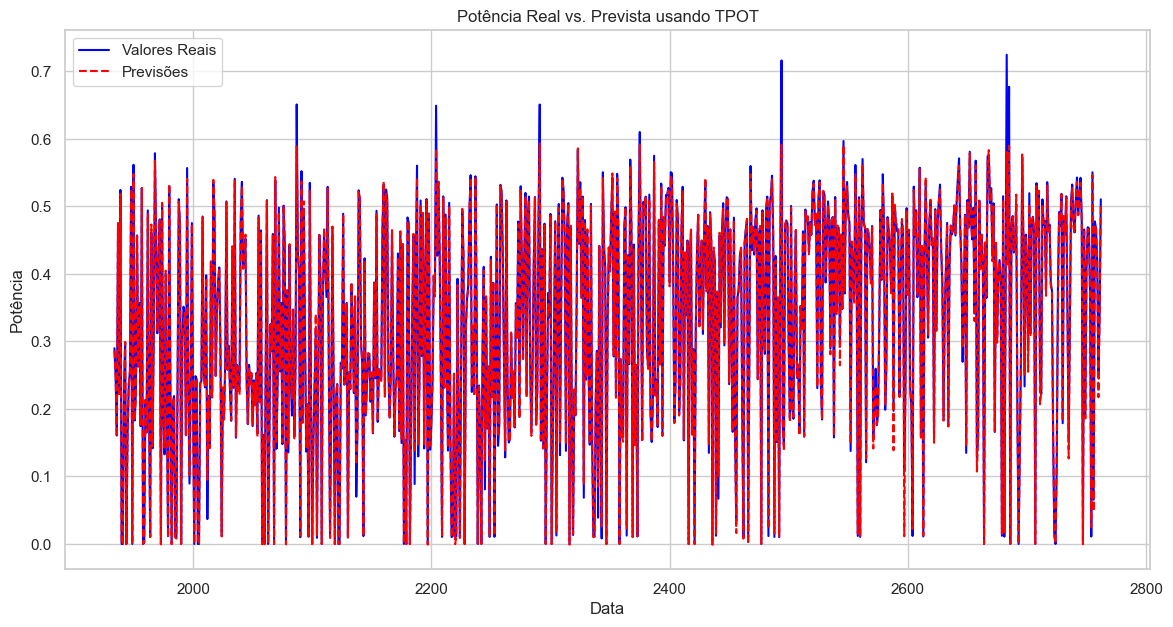

In [74]:
import pandas as pd
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Separar as features (todas as colunas exceto 'potencia') e o target ('potencia')
X = data.drop(['potencia'], axis=1)
y = data['potencia']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Inicializar o TPOTRegressor
tpot = TPOTRegressor(
    generations=7,  # Número de gerações para otimização
    population_size=100,  # Tamanho da população em cada geração
    verbosity=3,  # Nível de verbosidade
    random_state=42  # Para reprodutibilidade
)

# Treinar o modelo
tpot.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = tpot.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE no conjunto de teste: {mse:.4f}')

# Salvar o melhor pipeline encontrado
tpot.export('best_model_pipeline.py')

# Visualizar previsões vs valores reais
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Valores Reais', color='blue')
plt.plot(y_test.index, y_pred, label='Previsões', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Potência')
plt.title('Potência Real vs. Prevista usando TPOT')
plt.legend()
plt.show()


# FIM TPOT

In [50]:
# Transformar a coluna 'periodo' em uma coluna categórica usando one-hot encoding
data_periodo = pd.get_dummies(data['periodo'], prefix='periodo')
data_periodo = pd.concat([data.drop(columns=['periodo']), data_periodo], axis=1)
# Exibir as primeiras linhas do DataFrame resultante
data_periodo.head()

,hora,dia,mes,corrente,potencia,voltagem,uso_dia,dia_da_semana_Monday,dia_da_semana_Saturday,dia_da_semana_Sunday,dia_da_semana_Thursday,dia_da_semana_Tuesday,dia_da_semana_Wednesday,periodo_madrugada,periodo_manhã,periodo_noite,periodo_tarde
0,0,1,4,0.223276,0.161623,0.409849,1.000000,True,False,False,False,False,False,True,False,False,False
1,0,1,6,0.524976,0.494311,0.595132,0.818182,False,True,False,False,False,False,True,False,False,False
2,0,1,7,0.000000,0.000000,0.604154,1.000000,True,False,False,False,False,False,True,False,False,False
3,0,2,4,0.454239,0.413273,0.432405,0.818182,False,False,False,False,True,False,True,False,False,False
4,0,2,5,0.000000,0.000000,0.254362,0.727273,False,False,False,True,False,False,True,False,False,False


In [111]:
# Handle non-numeric columns (example: one-hot encoding for categorical features)
# data_encoded = pd.get_dummies(data.nome_do_dispositivo)
data_encoded = pd.concat([data, data_encoded, data_periodo], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [100]:
data_encoded = data_encoded.loc[:, ~data_encoded.T.duplicated()]
data_encoded = data_encoded.sort_values(by=['mes','dia','hora'])




In [ ]:
data_encoded['data'] = (
    '2024' +
    data_encoded['mes'].astype(str).str.zfill(2) +
    data_encoded['dia'].astype(str).str.zfill(2) +
    data_encoded['hora'].astype(str).str.zfill(2)
)
data_encoded = data_encoded.set_index('data')
data_encoded

,hora,dia,mes,dia_da_semana,corrente,potencia,voltagem,uso_dia,periodo,Tomada 1,...,Tomada 5,Tomada 6,Tomada 7,Tomada 8,Tomada 9,periodo_madrugada,periodo_manhã,periodo_noite,periodo_tarde,indice_unico
data,,,,,,,,,,,,,,,,,,,,,
20240304,0,4,3,0,0.000000,0.000000,2204.384615,16.0,madrugada,True,...,False,False,False,False,False,True,False,False,False,11
20240304,0,4,3,0,75.461538,68.538462,2199.846154,16.0,madrugada,False,...,False,False,False,False,False,True,False,False,False,2710
20240304,0,4,3,0,0.000000,0.000000,2173.538462,16.0,madrugada,False,...,False,False,False,False,False,True,False,False,False,5391
20240304,0,4,3,0,75.000000,62.230769,2187.461538,16.0,madrugada,False,...,False,False,False,False,False,True,False,False,False,8154
20240304,0,4,3,0,0.000000,0.000000,2171.307692,15.0,madrugada,False,...,False,False,False,False,False,True,False,False,False,10883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240709,23,9,7,1,29.000000,30.000000,2213.000000,14.0,noite,True,...,False,False,False,False,False,False,False,True,False,2624
20240709,23,9,7,1,818.000000,1683.000000,2208.000000,14.0,noite,False,...,False,False,False,False,False,False,False,True,False,8065
20240709,23,9,7,1,0.000000,0.000000,2191.000000,14.0,noite,False,...,False,False,False,False,False,False,False,True,False,10791


In [ ]:

data['dia_da_semana'] = data['dia_da_semana'].apply(lambda x: DIAS.index(x))